<a href="https://colab.research.google.com/github/mylethidiem/zero-to-hero/blob/main/preAIO25/AIOCodeMathDA/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[AIO2025] LẬP TRÌNH - TOÁN - DATA ANALYSIS \
LÊ THỊ DIỄM MY

# Day 31: Optimization


Tối ưu hóa (Optimization) là quá trình tìm giá trị tối ưu của một hàm mục tiêu, thường là cực tiểu hoặc cực đại của hàm số. Bài toán tối ưu hóa tổng quát có dạng:
$$
\underset{x}{min}f(x) \text{ subject to constraints}
$$
Trong đó: \
- f(x) là hàm mục tiêu cần tối ưu
- x là biến quyết định
- Constraints (ràng buộc) giới hạn miền giá trị hợp lệ của x


Các phương pháp tối ưu hóa phổ biến
- Gradient Descent:
$$
x_{t+1} = x_t-\alpha \nabla f(x_t)
$$
Với \alpha là tốc độ học

- Newton's Method: Tăng tốc hội tụ bằng cách sử dụng đào hàm bậc 2:
$$
x_{t+1} = x_t - \frac{f'(x_t)}{f''(x_t)}
$$

- Linear Programming (Quy hoạch tuyến tính): Dùng để tối ưu bài toán với ràng buộc tuyến tính (library: scipy.optimize.linprog)

### Bài 1: Tối ưu hàm một biến bằng Gradient Descent

In [ ]:
# f(x) = x^4 - 3x^3 + 2
# f'(x) = 4x^3 - 9x^2

import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x**4 - 3*x**3 + 2

def f_prime(x):
  return 4*x**3 - 9*x**2

# Gradient Descent
def gradient_descent(f_prime, x_init, learning_rate=0.01, epochs=100):
  x = x_init
  history = [x]

  for _ in range(epochs):
    x = x - learning_rate * f_prime(x)
    history.append(x)

  return x, history

# Run gradient descent
x_init = 0.5
learning_rate = 0.01
epochs = 100
x_optimal, history = gradient_descent(f_prime, x_init, learning_rate, epochs)

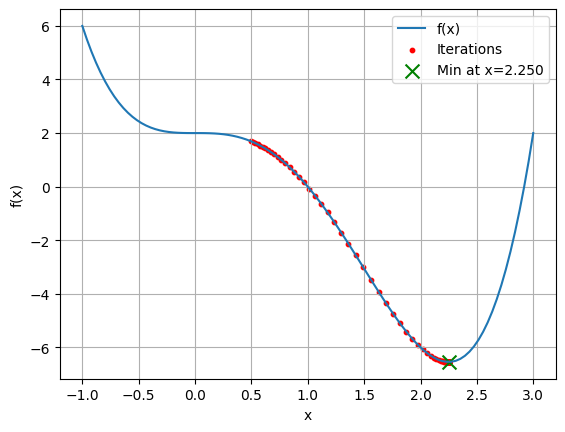

In [ ]:
#Graph
x_vals = np.linspace(-1, 3, 100)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label="f(x)")
plt.scatter(history, [f(x) for x in history], color="red", s=10, label="Iterations")
plt.scatter(x_optimal, f(x_optimal), color="green", marker="x", s=100, label=f"Min at x={x_optimal:.3f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

### Bài 2: Hồi quy tuyến tính với Gradient Descent

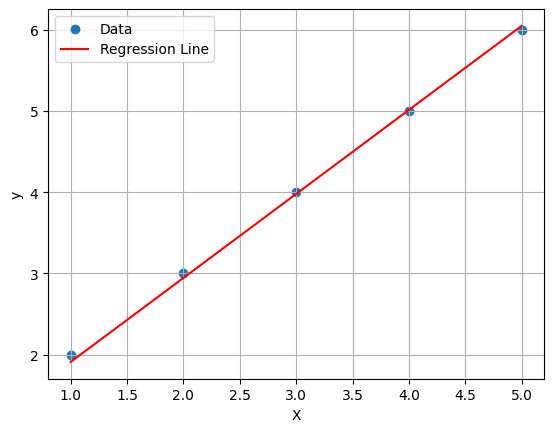

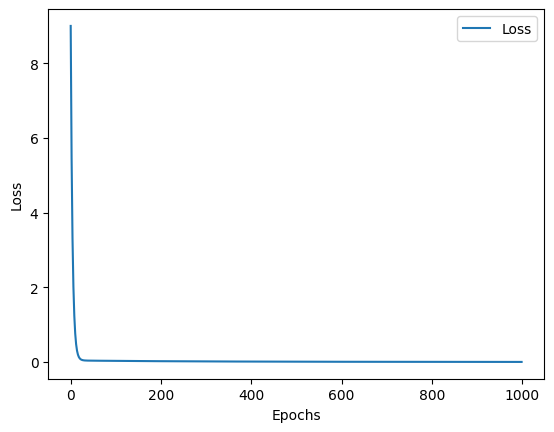

Hệ số tối ưu: w = 1.034, b = 0.876


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 3, 4, 5, 6])

# Hàm dự đoán
def forward(x, w, b):
    return w * x + b

# Tính gradient
def gradient(y, y_pred, x):
    dw = np.mean((y_pred - y) * x)  # Lấy trung bình
    db = np.mean(y_pred - y)
    return dw, db

# Hàm mất mát
def loss(y, y_pred):
    return np.mean((y_pred - y) ** 2) / 2  # Bình phương sai số

# Cập nhật tham số
def update(w, b, dw, db, learning_rate):
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

# Khởi tạo tham số
w, b = 0.0, 0.0
learning_rate = 0.01
epochs = 1000
losses = []

# Vòng lặp huấn luyện
for _ in range(epochs):
    y_preds = forward(X, w, b)  # Dự đoán toàn bộ tập dữ liệu
    loss_value = loss(Y, y_preds)
    losses.append(loss_value)

    dw, db = gradient(Y, y_preds, X)  # Tính gradient trên toàn bộ dữ liệu
    w, b = update(w, b, dw, db, learning_rate)  # Cập nhật tham số

# Vẽ đường hồi quy
plt.scatter(X, Y, label="Data")
plt.plot(X, forward(X, w, b), color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# Vẽ biểu đồ mất mát
plt.plot(losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print(f"Hệ số tối ưu: w = {w:.3f}, b = {b:.3f}")


### Bài 3: Newton's Method
$$
f(x) = x^3-6x^2 + 4x + 12 \\
f'(x) = 3x^2 - 12x + 4, \\
f''(x) = 6x - 12
$$

In [ ]:
def f_prime(x):
  return 3 * (x**2) - 12 * x + 4

def f_double_prime(x):
  return 6 * x - 12

x = 5
for _ in range(10):
  x = x - f_prime(x) / f_double_prime(x)

print(f"Cực tiểu tại x = {x:.3f}")


Cực tiểu tại x = 3.633


# Day 32: Linear Regression

Dự đoán giá vàng bằng Hồi quy tuyến tính

Bài toán sử dụng hồi quy tuyến tính để dự đoán giá vàng dựa trên 3 yếu tố đầu vào (features): \

- Giá USD Index: Chỉ số sức mạnh đồng USD
- Lãi suất: Lãi suất ngân hàng trung ương
- Giá dầu: Giá dầu thô thế giới

Mục tiêu: Xây dựng một mô hình hồi quy tuyến tính có dạng: \
$$
y = w_1x_1 + w_2x_2 + w_3x_3 + b
$$

trong đó: \
- $x_1, x_2, x_3$ là các features đầu vào
- $w_1, w_2, w_3$ là trọng số (weights) cần học
- b là bias

Mô hình sẽ học các trọng số tối ưu bằng cách giảm thiểu hàm mất mát (loss function) sử dụng thuật toán Gradient Descent.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu đầu vào (features)
X = np.array([
    [92.5, 2.1, 65.3],
    [93.2, 2.5, 67.2],
    [91.8, 2.3, 64.0],
    [94.0, 2.8, 70.1],
    [95.2, 3.0, 72.5],
    [96.1, 3.2, 74.3],
    [90.5, 1.8, 61.0],
    [92.0, 2.0, 63.2],
    [89.5, 1.5, 59.8],
    [97.0, 3.5, 76.2],
    [95.8, 3.1, 73.8],
    [94.5, 2.9, 71.5],
    [91.2, 2.2, 62.8],
    [90.0, 1.7, 60.5],
    [98.0, 3.7, 78.0],
    [99.2, 4.0, 80.5],
    [88.5, 1.3, 58.0],
    [87.8, 1.1, 56.5],
    [86.5, 1.0, 55.0],
    [100.0, 4.2, 82.0]
])
# Giá vàng thực tế tương ứng (target values)
y = np.array([
    1800, 1825, 1795, 1850, 1880, 1905, 1750, 1780, 1725, 1925,
    1890, 1860, 1775, 1740, 1950, 1980, 1700, 1680, 1650, 2000
])

class LinearRegression:
    def __init__(self):
        # Khởi tạo weights và bias bằng 0
        self.w = np.zeros(X.shape[1])  # weights cho 3 features
        self.b = 0  # bias

    def compute_gradients(self, X, y):
        m = len(y)  # số lượng mẫu

        # Tính giá trị dự đoán
        y_pred = X.dot(self.w) + self.b

        # Tính đạo hàm của Loss function theo w và b
        dw = (1/m) * X.T.dot(y_pred - y)  # Đạo hàm theo weights
        db = (1/m) * np.sum(y_pred - y)   # Đạo hàm theo bias

        return dw, db

    def fit(self, X, y, learning_rate=0.001, epochs=10):
        losses = []
        for epoch in range(epochs):
            # Tính gradient cho toàn bộ dữ liệu
            dw, db = self.compute_gradients(X, y)

            # Cập nhật weights và bias
            self.w = self.w - learning_rate * dw
            self.b = self.b - learning_rate * db

            # In loss function sau mỗi epoch
            y_pred = X.dot(self.w) + self.b
            loss = np.mean((y_pred - y) ** 2) / 2
            losses.append(loss)
            print(f'Epoch {epoch}, Loss: {loss:.2f}')
        return losses

    def predict(self, X):
        return X.dot(self.w) + self.b

# Normalize chỉ features X để tránh overflow
# Normalize giúp mô hình học tốt hơn, tránh việc feature lớn ảnh hưởng mạnh hơn feature nhỏ.
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Khởi tạo và huấn luyện mô hình
model = LinearRegression()
losses = model.fit(X_normalized, y, learning_rate=0.05, epochs=1000)

# In ra weights và bias cuối cùng
print("\nFinal weights:", model.w)
print("Final bias:", model.b)

# Dự đoán và so sánh kết quả
y_pred = model.predict(X_normalized)

print("\nSo sánh kết quả thực tế và dự đoán:")
for i in range(5):
    print(f"Thực tế: {y[i]:.2f}, Dự đoán: {y_pred[i]:.2f}")



Epoch 0, Loss: 1503124.23
Epoch 1, Loss: 1355949.76
Epoch 2, Loss: 1223296.42
Epoch 3, Loss: 1103700.91
Epoch 4, Loss: 995855.78
Epoch 5, Loss: 898590.53
Epoch 6, Loss: 810855.64
Epoch 7, Loss: 731708.91
Epoch 8, Loss: 660303.58
Epoch 9, Loss: 595878.07
Epoch 10, Loss: 537746.93
Epoch 11, Loss: 485292.88
Epoch 12, Loss: 437959.84
Epoch 13, Loss: 395246.65
Epoch 14, Loss: 356701.52
Epoch 15, Loss: 321917.09
Epoch 16, Loss: 290525.99
Epoch 17, Loss: 262196.86
Epoch 18, Loss: 236630.78
Epoch 19, Loss: 213558.10
Epoch 20, Loss: 192735.51
Epoch 21, Loss: 173943.48
Epoch 22, Loss: 156983.94
Epoch 23, Loss: 141678.15
Epoch 24, Loss: 127864.81
Epoch 25, Loss: 115398.37
Epoch 26, Loss: 104147.49
Epoch 27, Loss: 93993.61
Epoch 28, Loss: 84829.78
Epoch 29, Loss: 76559.45
Epoch 30, Loss: 69095.49
Epoch 31, Loss: 62359.28
Epoch 32, Loss: 56279.87
Epoch 33, Loss: 50793.20
Epoch 34, Loss: 45841.49
Epoch 35, Loss: 41372.58
Epoch 36, Loss: 37339.39
Epoch 37, Loss: 33699.43
Epoch 38, Loss: 30414.37
Epoc

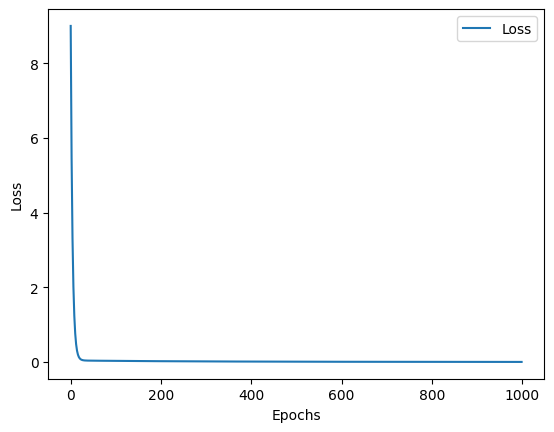

In [ ]:
# Vẽ biểu đồ mất mát
plt.plot(losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Hướng Dẫn Cài Đặt Server Cơ Sở Dữ Liệu MySQL & Công Cụ Tương Tác:
1) Cài đặt:
- Bước 1: Cài đặt MySQL Server: https://dev.mysql.com/downloads/installer/
- Bước 2: Cài đặt công cụ tương tác với MySQL: Khuyến khích các bạn sử dụng DBeaver vì nó hỗ trợ làm việc với nhiều loại cơ sở dữ liệu khác nhau trong cùng một giao diện.


# Day 33 Work with SQLite Database

1. Làm quen với CSDL SQLite \
✔ Nhẹ, nhỏ gọn: SQLite chỉ là một thư viện C, không cần cài đặt server, không có quá trình chạy nền.  \
✔ Không cần client-server: Không có kết nối TCP/IP giữa client và server, mà tất cả dữ liệu nằm trong một file .db duy nhất.   \
✔ Dễ sử dụng: Chỉ cần import thư viện là có thể thao tác với database ngay trong ứng dụng.  \
✔ Phù hợp với mobile và ứng dụng embedded: Được sử dụng rộng rãi trên Android, iOS, trình duyệt, ứng dụng nhúng (IoT).  \

So sánh: \

| Tiêu chí | SQLite | MySQL / PostgreSQL |
| --- | --- | --- |
| Kiến trúc | Không cần server, file .db đơn lẻ | Client-Server |
| Hiệu suất | Nhanh với dữ liệu nhỏ | Tốt hơn cho dữ liệu lớn |
| Tính đồng thời | Hỗ trợ cơ bản (khóa file) | Hỗ trợ nhiều kết nối |
| Bảo mật | Bảo mật cơ bản, không có user management | Hỗ trợ user roles, encryption |
| Sử dụng | Mobile app, desktop, IoT | Web app, enterprise, big data |

2. Làm quen với các câu lệnh SQL
- Ví dụ chúng ta cần quản lý thông tin khách hàng gồm các trường dữ liệu cơ bản như sau: \
Customer: Email, Name, Phone

In [15]:
import sqlite3

# Tạo kết nối tới CSDL có tên là database.sqlite
# Nếu database.sqlite chưa tồn tại trong hệ thống thì nó sẽ tự tạo mới
connection = sqlite3.connect('databasevd.sqlite')
cursor = connection.cursor()

In [ ]:
# Tạo Bảng CUSTOMERS gồm 3 cột email , name , phone với email là khóa chính
cursor.execute("""
CREATE TABLE CUSTOMERS (
  EMAIL TEXT PRIMARY KEY,
  NAME TEXT NOT NULL,
  PHONE TEXT NOT NULL
);
""")

In [5]:
# -- Lấy toàn bộ dữ liệu của tất cả cột trong bảng CUSTOMERS
cursor.execute("""
  SELECT *
  FROM CUSTOMERS ;
""")

In [6]:
# -- Lấy dữ liệu từ các cột được chỉ định trong bảng CUSTOMERS
cursor.execute("""
  SELECT NAME , PHONE
  FROM CUSTOMERS ;
""")

In [9]:
# -- Lấy dữ liệu theo điều kiện email = giá trị truyền vào từ bảng CUSTOMERS
cursor.execute("""
  SELECT NAME, PHONE
  FROM CUSTOMERS
  WHERE 1 = 1
  AND EMAIL = 'example@gmail.com';
""")

In [ ]:
# -- Thêm mới 1 dòng trong bảng CUSTOMERS
cursor.execute("""
  INSERT INTO CUSTOMERS (EMAIL, NAME, PHONE)
  VALUES ('NVA@gmail.com', 'A', '123456789');
""")

In [ ]:
#  -- Thêm mới nhiều dòng trong bảng CUSTOMERS
cursor.execute("""
  INSERT INTO CUSTOMERS (EMAIL, NAME, PHONE)
  VALUES
    ('NVA@gmail.com', 'A', '123456789'),
    ('NVB@gmail.com', 'B', '987654321');
""")


In [ ]:
# -- Cập nhật tên của email là NVA@gmail.com thành VA
cursor.execute("""
  INSERT INTO CUSTOMERS (EMAIL, NAME, PHONE)
  VALUES('NVA@gmail.com', 'VA', '123456789');
""")

In [ ]:
# -- Xóa email: NVA@gmail.com khỏi bảng CUSTOMERS
cursor.execute("""
  DELETE FROM CUSTOMERS
  WHERE 1 = 1
  AND EMAIL = 'NVA@gmail.com';
""")

→ Mở rộng: Khi thực hiện thao tác INSERT/UPDATE/DELETE, khi thực hiện
cursor.execute() trên cơ sở dữ liệu SQLite, những thay đổi này chỉ được lưu trữ
tạm thời trong bộ nhớ. Nên chúng ta cần phải thực bước commit để lưu những
thay đổi này vào CSDL, đảm bảo chúng được lưu trữ vĩnh viễn.

In [4]:
import pandas as pd
# Lấy tất cả data từ bảng CUSTOMER
data = pd.read_sql_query ("SELECT * FROM CUSTOMERS ", connection)
print(data)

Empty DataFrame
Columns: [EMAIL, NAME, PHONE]
Index: []


# Day 34

# Day 35